### Final Project

## Title: 2022 World Cup Groups winners Prediction model using Logistic Regression

-----------------------------------------------------------------------------------------------

## Data Preparation:
### in this step we loaded our datasets imported and the necessary modules to run the code

In [0]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [0]:
# File location and type
file_location = "/FileStore/tables/fifa_ranking-5.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)


# File location and type
file_location = "/FileStore/tables/results-4.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df2 = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)


# File location and type
file_location = "/FileStore/tables/export__1_-2.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df3 = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df2)


date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,false
1873-03-08,England,Scotland,4,2,Friendly,London,England,false
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,false
1875-03-06,England,Scotland,2,2,Friendly,London,England,false
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,false
1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,false
1877-03-03,England,Scotland,1,3,Friendly,London,England,false
1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,false
1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,false
1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,false


In [0]:
# We need to read the imported ranking dataframe

ranking = df.toPandas()
ranking = ranking.loc[:,['rank', 'country_fullname', 'name_abrv', 'current_year_average_weight', 'rank_date', 
                           'two_year_rank_weight', 'three_yearrank_weight']]

ranking['weighted_avgpoints'] =  rankings['current_year_averageg_weight'] + rankings['two_year_rank_weight'] + rankings['three_yearrank_weight']
ranking['rank_lastdate'] = pd.to_datetime(rankings['rank_date'])

rankings.head(160)

,rank,country_full,country_abrv,cur_year_avg_weighted,rank_date,two_year_ago_weighted,three_year_ago_weighted,weighted_points
0,1,Germany,GER,0.0,1993-08-08,0.0,0.0,0.0
1,2,Italy,ITA,0.0,1993-08-08,0.0,0.0,0.0
2,3,Switzerland,SUI,0.0,1993-08-08,0.0,0.0,0.0
3,4,Sweden,SWE,0.0,1993-08-08,0.0,0.0,0.0
4,5,Argentina,ARG,0.0,1993-08-08,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
155,157,Nepal,NEP,0.0,1993-08-08,0.0,0.0,0.0
156,158,Liechtenstein,LIE,0.0,1993-08-08,0.0,0.0,0.0
157,159,Equatorial Guinea,EQG,0.0,1993-08-08,0.0,0.0,0.0
158,160,Chinese Taipei,TPE,0.0,1993-08-08,0.0,0.0,0.0


In [0]:
# Import a dataset that contains all games from 1872 until 2028
Games=df2.toPandas()


Games['date'] = pd.to_datetime(Games['date'])
#Games['tournament'].head(100)
Games.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [0]:
wc_participant = df3.toPandas()
wc_participant = wc_participant.loc[:, ['Team', 'Group#','appearances number','titles #','First game', 'Second game', 'Third game']]
wc_participant = wc_participant.dropna(how='all')
wc_participant = wc_participant.set_index('Team')

wc_participant.head()

,Group,Previous appearances,Previous titles,First match against,Second match against,Third match against
Team,,,,,,
Qatar,A,0,0,Ecuador,Senegal,Netherlands
Ecuador,A,3,0,Qatar,Netherlands,Senegl
Netherlands,A,10,0,Senegal,Ecuador,Qatar
Senegal,A,2,0,Netherlands,Qatar,Ecuador
USA,B,10,0,Wales,England,Iran


## Feature Extraction

In [0]:
# Our aim is to get the complete rank history 
ranking = ranking.set_index(['rank_lastdate'])\
            .groupby(['country_full'], group_keys=False)\
            .resample('D').first()\
            .fillna(method='ffill')\
            .reset_index()

# merging the dataframes ranking with games

Games = Games.merge(ranking, 
                        left_on=['date', 'away_team'], 
                        right_on=['rank_date', 'country_full'], 
                        suffixes=('_home', '_away'))
Games.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,three_year_ago_weighted_home,weighted_points_home,rank_date_away,rank_away,country_full_away,country_abrv_away,cur_year_avg_weighted_away,two_year_ago_weighted_away,three_year_ago_weighted_away,weighted_points_away
0,2000-02-03,Scotland,Wales,5,2,British Championship,Aberdeen,Scotland,False,2000-02-03,...,0.0,0.0,2000-02-03,98.0,Wales,WAL,0.0,0.0,0.0,0.0
1,2000-02-24,Wales,Northern Ireland,2,0,British Championship,Llandudno,Wales,False,2000-02-24,...,0.0,0.0,2000-02-24,88.0,Northern Ireland,NIR,0.0,0.0,0.0,0.0
2,2000-03-03,Northern Ireland,Scotland,0,3,British Championship,Belfast,Republic of Ireland,False,2000-03-03,...,0.0,0.0,2000-03-03,20.0,Scotland,SCO,0.0,0.0,0.0,0.0
3,2000-03-17,Northern Ireland,England,0,2,British Championship,Dublin,Republic of Ireland,False,2000-03-17,...,0.0,0.0,2000-03-17,11.0,England,ENG,0.0,0.0,0.0,0.0
4,2000-03-26,Wales,England,1,1,British Championship,Cardiff,Wales,False,2000-03-26,...,0.0,0.0,2000-03-26,11.0,England,ENG,0.0,0.0,0.0,0.0


Out[23]: <AxesSubplot:>

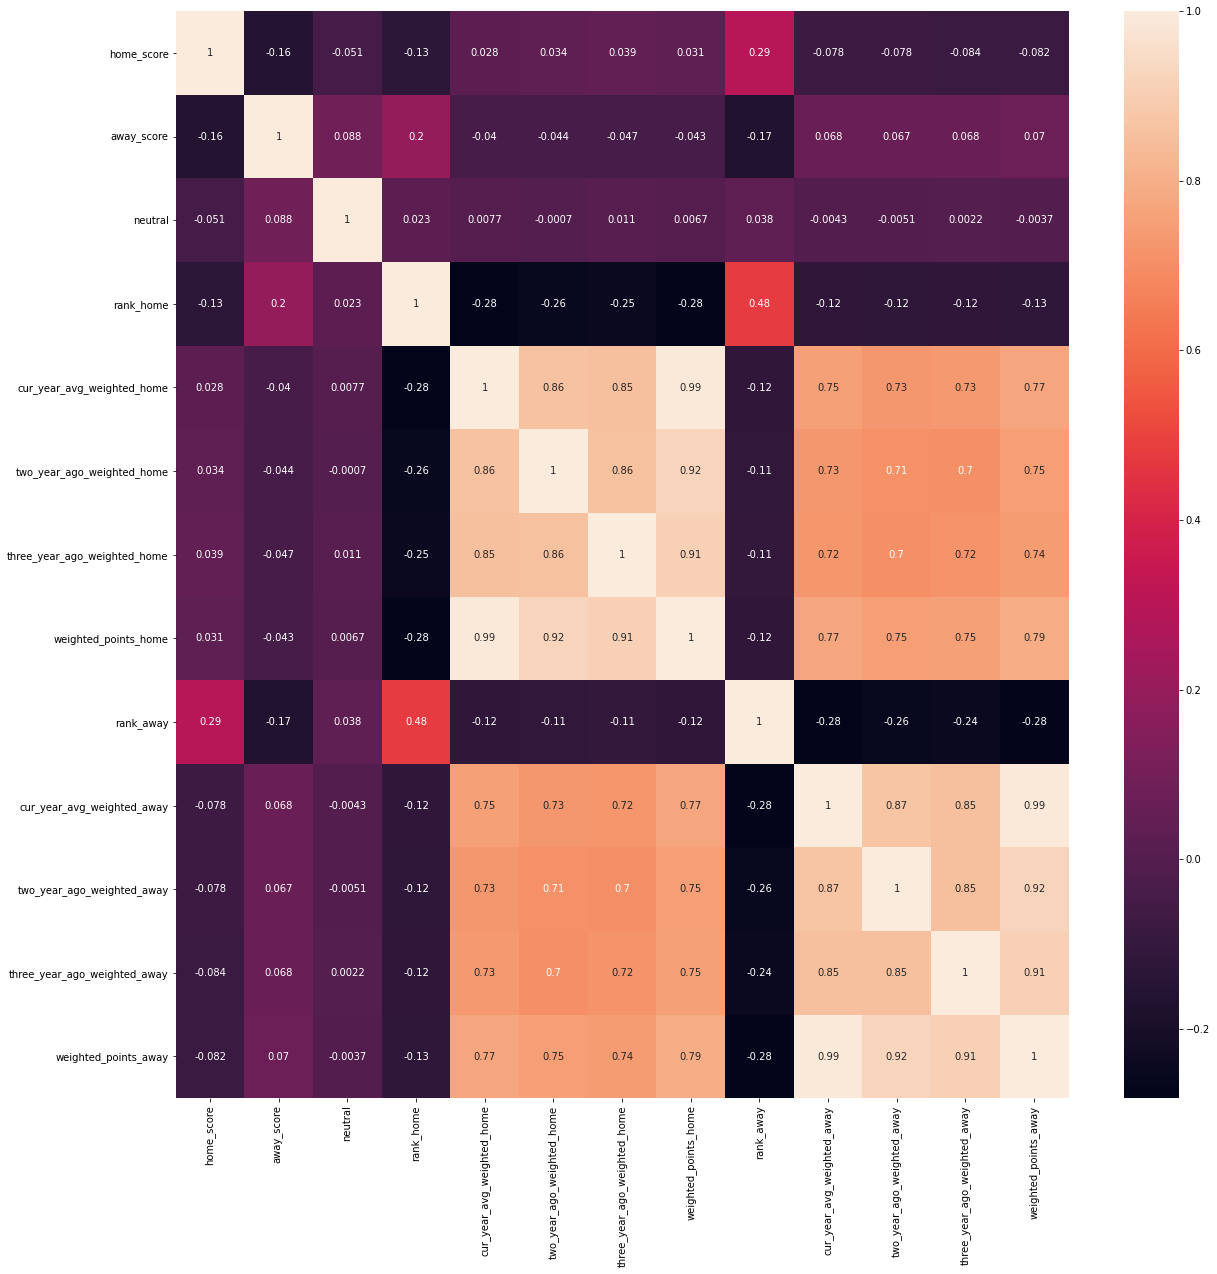

In [0]:
# Plotting the correlation between variables

import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(30, 20)
correlation = Games.corr()
correlation
sns.heatmap(correlation,annot=True)

In [0]:
# Here we generate our features, I chose these exact features(including computed features) as they seem more relevant to me after seeing the correlation plot and also considering important factors in soccer
Games['diff'] = Games['rank_home'] - Games['rank_away']
Games['avgrank'] = (Games['rank_home'] + Games['rank_away'])/2
Games['diff_in_goals'] = Games['home_score'] - Games['away_score']
Games['Outcome'] = Games['score_difference'] > 0 # consider the draw as a loss
Games['Competition'] = Games['tournament'] != 'Friendly' #don´t include the friendly_games
Games['wc_participant'] = Games['home_team'] * Games['home_team'].isin(wc_participant.index.tolist())
Games['wc_participant'] = Games['wc_participant'].replace({'':'Other'})


## Data modelling

In [0]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


In [0]:



X, y = Games.loc[:,['avgrank', 'diff', 'Competition']], matches['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

logreg = linear_model.LogisticRegression(C=1e-5, max_iter=2300)
features = PolynomialFeatures(degree=2)
mod = Pipeline([
    ('polynomial_features', features),
    ('logistic_regression', logreg)
])
mod = mod.fit(X_train, y_train)



## Performance Evaluation

Logistic Regression accuracy is : 0.6686946902654868
              precision    recall  f1-score   support

       False       0.68      0.67      0.68      1860
        True       0.66      0.66      0.66      1756

    accuracy                           0.67      3616
   macro avg       0.67      0.67      0.67      3616
weighted avg       0.67      0.67      0.67      3616

Out[11]: <AxesSubplot:>

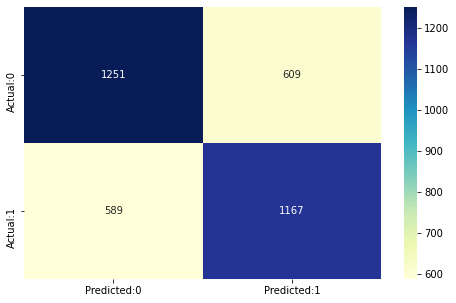

In [0]:
# Performance Evaluation: Accuracy and Confusion Matrix

mod_accuracy = mod.score(X_test,y_test)
print("Model accuracy is :",mod_accuracy)

pred= model.predict(X_test)
results = classification_report(y_test,lr_pred)
print(results)



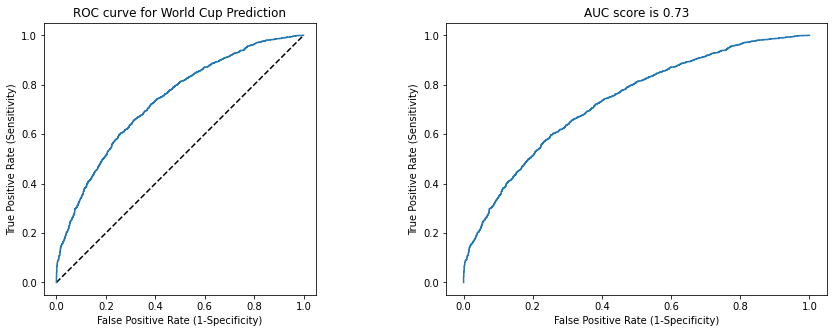

Stakes distribution in the wrong predictions
True     0.993322
False    0.006678
Name: is_stake, dtype: float64
Stakes distribution overall
True     0.995022
False    0.004978
Name: is_stake, dtype: float64


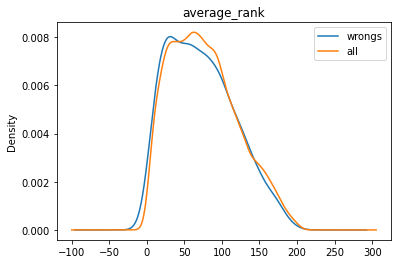

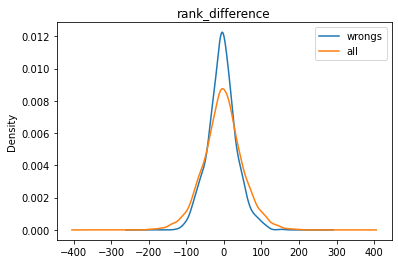

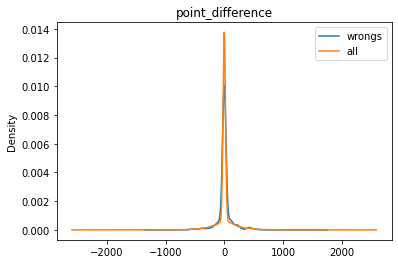

## World cup simulations

### Group Stages

In [0]:
# The 0.05 is the threshold to count the game as a draw
threshold = 0.05

# world_cup dataset let´s us know the ranking at the beginning of the world cup
world_cup = ranking.loc[(ranking['rank_lastdate'] == ranking['rank_lastdate'].max()) & 
                                    ranking['country_full'].isin(wc_participant.index.unique())]
world_cup = world_cup.set_index(['country_full'])

In [0]:


opponents_game = ['Game 1\nvs', 'Game 2\nvs', 'Game 3\nvs']

# Initialize participants' points and total probabilities
wc_participant['points'] = 0
wc_participant['probs'] = 0

def calculate_points(win_prob, threshold, home_team, away_team):
    if win_prob <= 0.5 - threshold:
        print("{} prob of win is {:.2f}".format(away_team, 1 - win_prob))
        wc_participant.loc[away_team, 'points'] += 3
    elif win_prob >= 0.5 + threshold:
        wc_participant.loc[home_team, 'points'] += 3
        print("{} prob of win is {:.2f}".format(home_team, win_prob))
    else:
        print("Draw")
        wc_participant.loc[home_team, 'points'] += 1
        wc_participant.loc[away_team, 'points'] += 1

for group in set(wc_participant['Group']):
    print('___GROUP{}:___'.format(group))
    for home_team, away_team in combinations(wc_participant.query('Group == "{}"'.format(group)).index, 2):
        print("{} vs. {}: ".format(home_team, away_team), end='')
        
        # Prepare data for prediction
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        rank_home = world_cup_rankings.loc[home_team, 'rank']
        points_home = world_cup_rankings.loc[home_team, 'weighted_points']
        rank-Of_opp = world_cup_rankings.loc[away_team, 'rank']
        
        # Calculate features
        row['average_rank'] = (rank_home + rank-Of_opp) / 2
        row['rank_difference'] = rank_home - rank-Of_opp
        row['point_difference'] = points_home - opp_points
        
        # Predict the outcome using the model
        win_prob = mod.predict_proba(row)[:, 1][0]
        wc_participant.loc[home_team, 'probs'] += win_prob
        wc_participant.loc[away_team, 'probs'] += 1 - win_prob
        
        # Determine points and print result
        
        calculate_points(win_prob, threshold, home_team, away_team)


___Starting group G:___
Cameroon vs. Brazil: Brazil wins with 0.79
Cameroon vs. Switzerland: Switzerland wins with 0.76
Cameroon vs. Serbia: Serbia wins with 0.61
Brazil vs. Switzerland: Draw
Brazil vs. Serbia: Brazil wins with 0.64
Switzerland vs. Serbia: Switzerland wins with 0.62
___Starting group F:___
Morocco vs. Croatia: Croatia wins with 0.63
Morocco vs. Belgium: Belgium wins with 0.74
Morocco vs. Canada: Morocco wins with 0.63
Croatia vs. Belgium: Belgium wins with 0.63
Croatia vs. Canada: Croatia wins with 0.72
Belgium vs. Canada: Belgium wins with 0.74
___Starting group H:___
Uruguay vs. Portugal: Portugal wins with 0.57
Uruguay vs. Korea Republic: Uruguay wins with 0.66
Uruguay vs. Ghana: Uruguay wins with 0.63
Portugal vs. Korea Republic: Portugal wins with 0.69
Portugal vs. Ghana: Portugal wins with 0.67
Korea Republic vs. Ghana: Ghana wins with 0.59
___Starting group B:___
USA vs. Iran: Draw
USA vs. Wales: Draw
USA vs. England: England wins with 0.59
Iran vs. Wales: Wales

Single - elimination rounds

In [0]:
world_cup

,Group,Previous appearances,Previous titles,First match against,Second match against,Third match against,points,total_prob
Team,,,,,,,,
Qatar,A,0,0,Ecuador,Senegal,Netherlands,0,0.563739
Ecuador,A,3,0,Qatar,Netherlands,Senegl,3,1.247634
Netherlands,A,10,0,Senegal,Ecuador,Qatar,7,2.193213
Senegal,A,2,0,Netherlands,Qatar,Ecuador,7,1.995414
USA,B,10,0,Wales,England,Iran,2,1.403472
Iran,B,5,0,England,Wales,USA,1,1.175040
Wales,B,1,0,USA,Iran,England,4,1.607512
England,B,15,1,Iran,USA,Wales,9,1.813976
Saudi Arabia,C,5,0,Argentina,Poland,Mexico,0,0.550487


___The round_of_16___
Netherlands vs. Wales: Netherlands wins with probability 0.51
Argentina vs. Denmark: Argentina wins with probability 0.52
Germany vs. Croatia: Germany wins with probability 0.61
Brazil vs. Uruguay: Brazil wins with probability 0.56
Senegal vs. England: England wins with probability 0.61
Poland vs. France: France wins with probability 0.52
Spain vs. Belgium: Belgium wins with probability 0.56
Switzerland vs. Portugal: Portugal wins with probability 0.53


___The quarterfinal___
Netherlands vs. Argentina: Argentina wins with probability 0.57
Germany vs. Brazil: Germany wins with probability 0.54
England vs. France: France wins with probability 0.53
Belgium vs. Portugal: Belgium wins with probability 0.51


___The semifinal___
Argentina vs. Germany: Germany wins with probability 0.56
France vs. Belgium: Belgium wins with probability 0.55


___The final___
Germany vs. Belgium: Germany wins with probability 0.53


